In [ ]:
!wget https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg

--2021-11-10 07:54:41--  https://ribsandburgers.com/au/wp-content/uploads/2019/03/2-angus-bacon-and-cheese.jpg
Resolving ribsandburgers.com (ribsandburgers.com)... 103.242.49.242
Connecting to ribsandburgers.com (ribsandburgers.com)|103.242.49.242|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58178 (57K) [image/jpeg]
Saving to: ‘2-angus-bacon-and-cheese.jpg’

2-angus-bacon-and-c 100%[===================>]  56.81K  --.-KB/s    in 0.1s    

2021-11-10 07:54:42 (392 KB/s) - ‘2-angus-bacon-and-cheese.jpg’ saved [58178/58178]



In [ ]:
# import the necessary packages
from matplotlib import pyplot as plt
import argparse
import cv2

In [ ]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

Average blurring (cv2.blur)

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/2-angus-bacon-and-cheese.jpg"
}

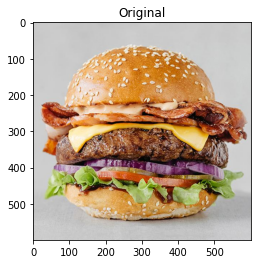

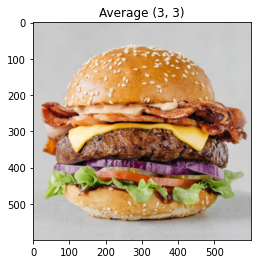

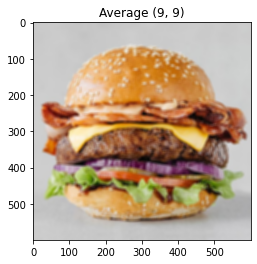

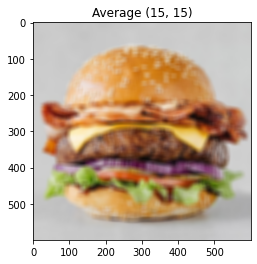

In [ ]:
# load the image, display it to our screen, and initialize a list of
# kernel sizes (so we can evaluate the relationship between kernel
# size and amount of blurring)
image = cv2.imread(args["image"])
plt_imshow("Original", image)
kernelSizes = [(3, 3), (9, 9), (15, 15)]

# loop over the kernel sizes
for (kX, kY) in kernelSizes:
	# apply an "average" blur to the image using the current kernel
	# size
	blurred = cv2.blur(image, (kX, kY))
	plt_imshow("Average ({}, {})".format(kX, kY), blurred)

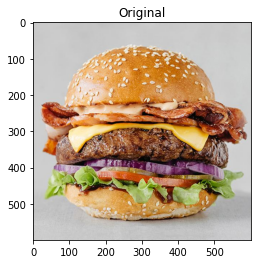

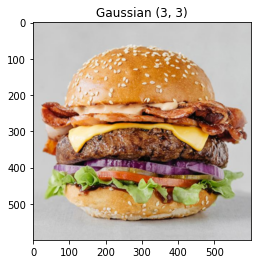

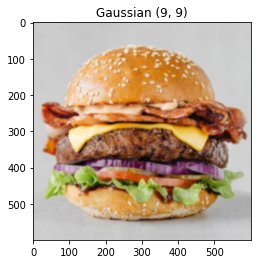

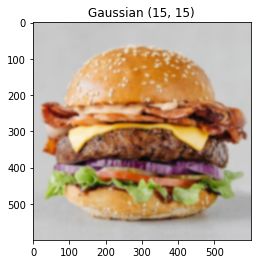

In [ ]:
# display the original image
plt_imshow("Original", image)

# loop over the kernel sizes again
for (kX, kY) in kernelSizes:
	# apply a "Gaussian" blur to the image
	blurred = cv2.GaussianBlur(image, (kX, kY), 0)
	plt_imshow("Gaussian ({}, {})".format(kX, kY), blurred)

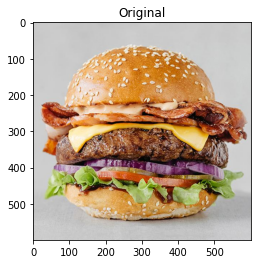

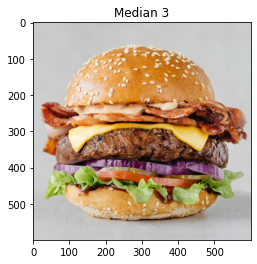

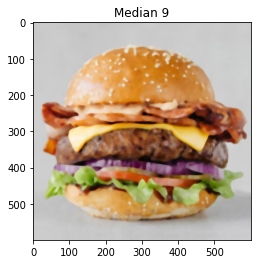

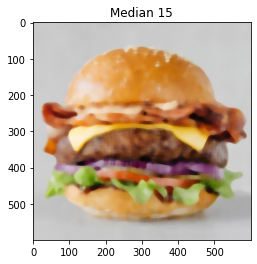

In [ ]:
# display the original image
plt_imshow("Original", image)

# loop over the kernel sizes a final time
for k in (3, 9, 15):
	# apply a "median" blur to the image
	blurred = cv2.medianBlur(image, k)
	plt_imshow("Median {}".format(k), blurred)

Bilateral blurring (cv2.bilateralFilter)

In [ ]:
# since we are using Jupyter Notebooks we can replace our argument
# parsing code with *hard coded* arguments and values
args = {
	"image": "/content/2-angus-bacon-and-cheese.jpg"
}

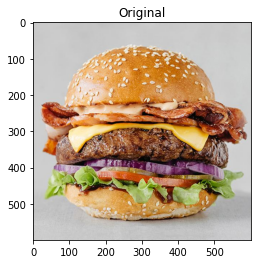

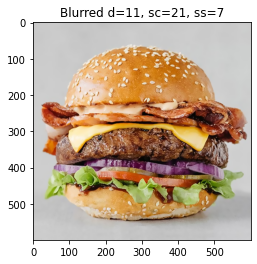

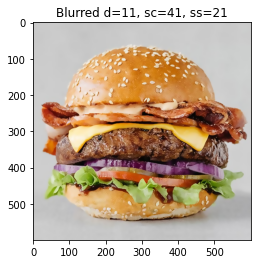

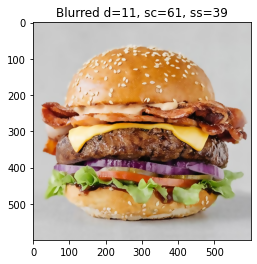

In [ ]:
# load the image, display it to our screen, and construct a list of
# bilateral filtering parameters that we are going to explore
image = cv2.imread(args["image"])
plt_imshow("Original", image)
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39)]

# loop over the diameter, sigma color, and sigma space
for (diameter, sigmaColor, sigmaSpace) in params:
	# apply bilateral filtering to the image using the current set of
	# parameters
	blurred = cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)

	# show the output image and associated parameters
	title = "Blurred d={}, sc={}, ss={}".format(
		diameter, sigmaColor, sigmaSpace)
	plt_imshow(title, blurred)